# K-Means

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Generar un set de ejemplo

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y =make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

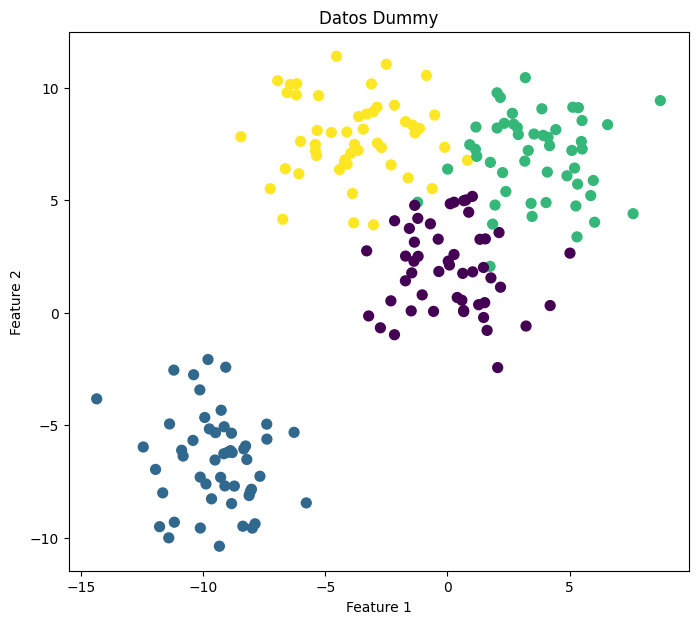

In [4]:
plt.figure(figsize=(8,7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
plt.title('Datos Dummy')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Elaborar el modelo de clusterización mediante K-Means

In [5]:
from sklearn.cluster import KMeans

# Definir y entrenar el modelo K-Means (usaremos 4 clusters como en los datos simulados)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [6]:
# Centroides encontrados por K-Means
kmeans.cluster_centers_

array([[-9.46941837, -6.56081545],
       [-0.0123077 ,  2.13407664],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [7]:
# Etiquetas de cluster asignadas a cada punto
y_kmeans = kmeans.labels_
y_kmeans[:10]

array([2, 3, 1, 3, 3, 0, 3, 1, 3, 1], dtype=int32)

In [8]:
# Inercia (suma de distancias cuadradas al centroide)
kmeans.inertia_

1318.403572554749

In [9]:
# (Opcional) Crear un DataFrame para inspeccionar los puntos y su cluster
import pandas as pd
df_clusters = pd.DataFrame(X, columns=['x1', 'x2'])
df_clusters['cluster'] = y_kmeans
df_clusters.head()

,x1,x2,cluster
0,-6.428841,10.141117,2
1,5.868679,5.201104,3
2,-0.376109,3.264279,1
3,2.166792,9.563005,3
4,5.095086,7.207527,3


In [10]:
# (Opcional) Cantidad de puntos por cluster
import numpy as np
unique, counts = np.unique(y_kmeans, return_counts=True)
list(zip(unique, counts))

[(np.int32(0), np.int64(50)),
 (np.int32(1), np.int64(54)),
 (np.int32(2), np.int64(46)),
 (np.int32(3), np.int64(50))]

#### Graficar la clusterización

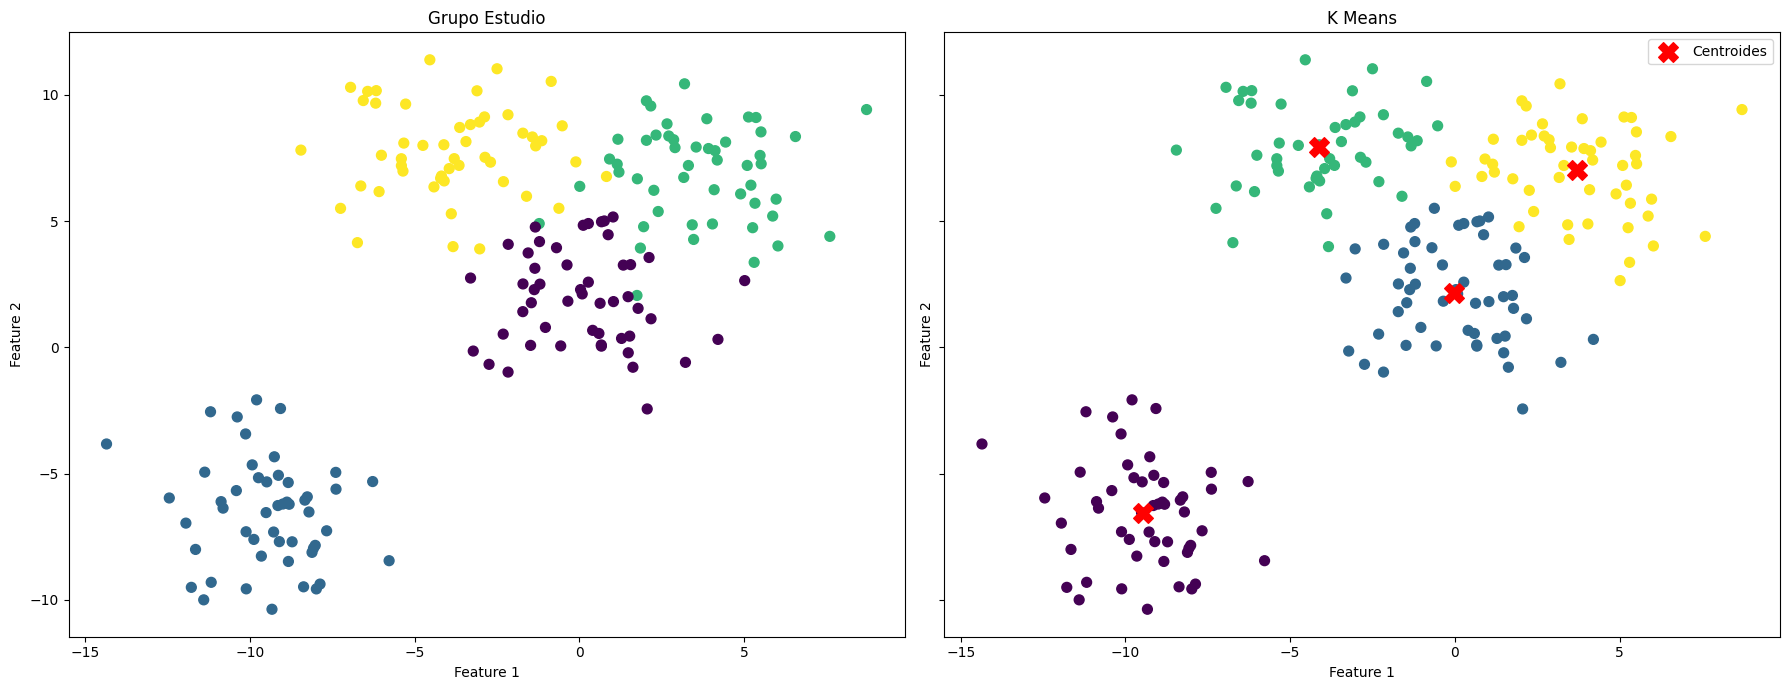

In [11]:
fig, (axes1,axes2) = plt.subplots(1,2, sharey=True, figsize=(18,7))

# Datos originales coloreados por la clase verdadera
axes1.set_title('Grupo Estudio')
axes1.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
axes1.set_xlabel('Feature 1')
axes1.set_ylabel('Feature 2')

# Resultados de K-Means coloreados por cluster asignado
axes2.set_title('K Means')
axes2.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='viridis', s=50)
axes2.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
               s=200, c='red', marker='X', label='Centroides')
axes2.set_xlabel('Feature 1')
axes2.set_ylabel('Feature 2')
axes2.legend()

plt.tight_layout()
plt.show()

#### Metodo del Codo

In [12]:
# Metodo del Codo: calcular la inercia para distintos valores de k
from sklearn.cluster import KMeans

inertias = []
k_values = range(1, 11)
for k in k_values:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    kmeans_k.fit(X)
    inertias.append(kmeans_k.inertia_)

inertias

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

[12633.993683268436,
 3799.1629099413412,
 2288.3257357514935,
 1318.403572554749,
 1141.4979585790281,
 1023.636220393748,
 918.1998988718299,
 877.8482721025757,
 764.6516090579012,
 712.0304070389418]

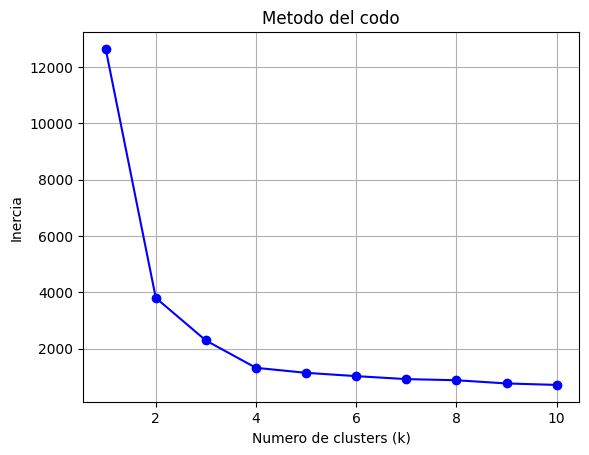

In [13]:
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Inercia')
plt.plot(list(k_values), inertias, 'bo-')
plt.grid(True)
plt.show()

#### Coeficiente de silueta

In [14]:
# Coeficiente de silueta promedio para distintos valores de k
from sklearn.metrics import silhouette_score, silhouette_samples

range_n_clusters = range(2, 11)
silhouette_avgs = []
for k in range_n_clusters:
    kmeans_k = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans_k.fit_predict(X)
    silhouette_avgs.append(silhouette_score(X, cluster_labels))

silhouette_avgs

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

[np.float64(0.6490840372235874),
 np.float64(0.5021702155773816),
 np.float64(0.5519773421333025),
 np.float64(0.4894862510335078),
 np.float64(0.46993409563471494),
 np.float64(0.45507068764574155),
 np.float64(0.4264556850529553),
 np.float64(0.4496277191430782),
 np.float64(0.4395171843634582)]

In [15]:
# Mostrar los valores de silueta promedio
for k, s in zip(range_n_clusters, silhouette_avgs):
    print(f"k = {k}, coeficiente de silueta promedio = {s:.3f}")

k = 2, coeficiente de silueta promedio = 0.649
k = 3, coeficiente de silueta promedio = 0.502
k = 4, coeficiente de silueta promedio = 0.552
k = 5, coeficiente de silueta promedio = 0.489
k = 6, coeficiente de silueta promedio = 0.470
k = 7, coeficiente de silueta promedio = 0.455
k = 8, coeficiente de silueta promedio = 0.426
k = 9, coeficiente de silueta promedio = 0.450
k = 10, coeficiente de silueta promedio = 0.440


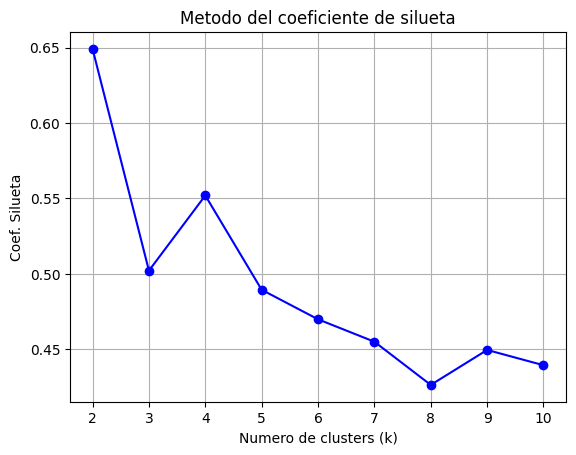

In [16]:
plt.title('Metodo del coeficiente de silueta')
plt.xlabel('Numero de clusters (k)')
plt.ylabel('Coef. Silueta')
plt.plot(list(range_n_clusters), silhouette_avgs, 'bo-')
plt.grid(True)
plt.show()

c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6490840372235874


c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5021702155773816
For n_clusters = 4 The average silhouette_score is : 0.551269872192081
For n_clusters = 5 The average silhouette_score is : 0.4734193450593858


c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4447919215760535


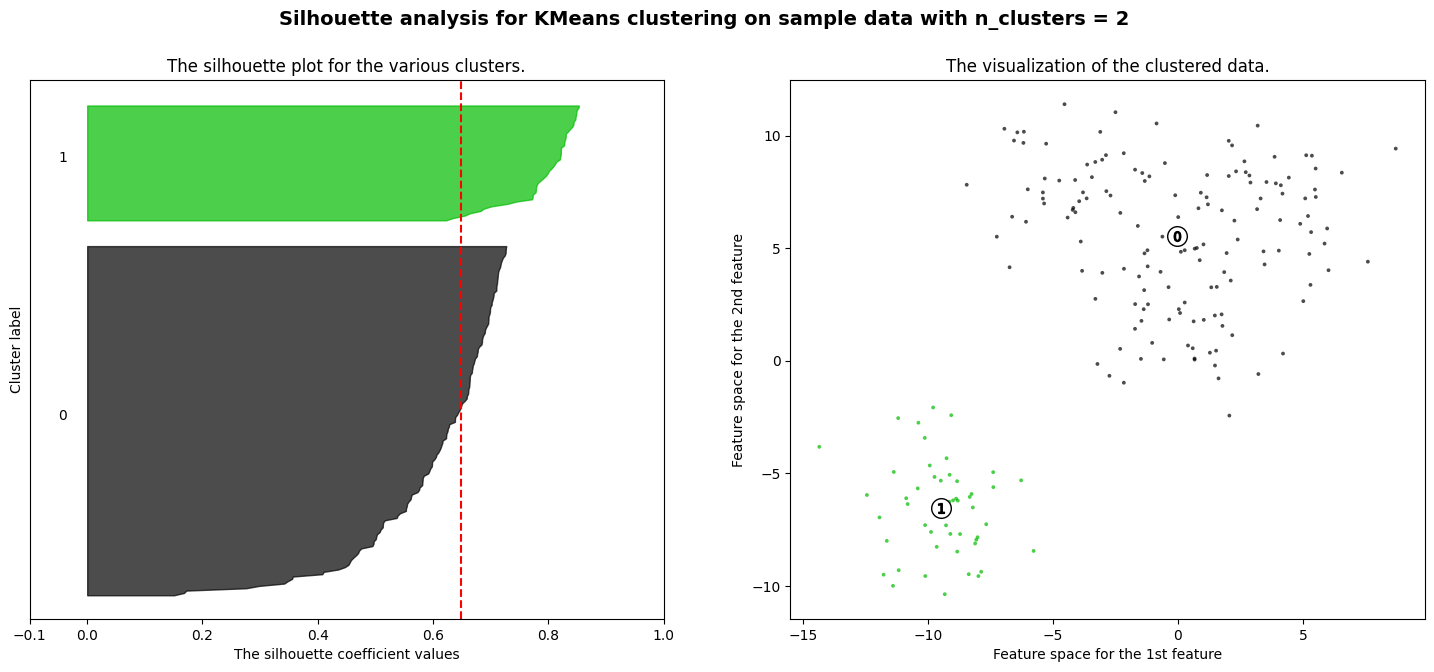

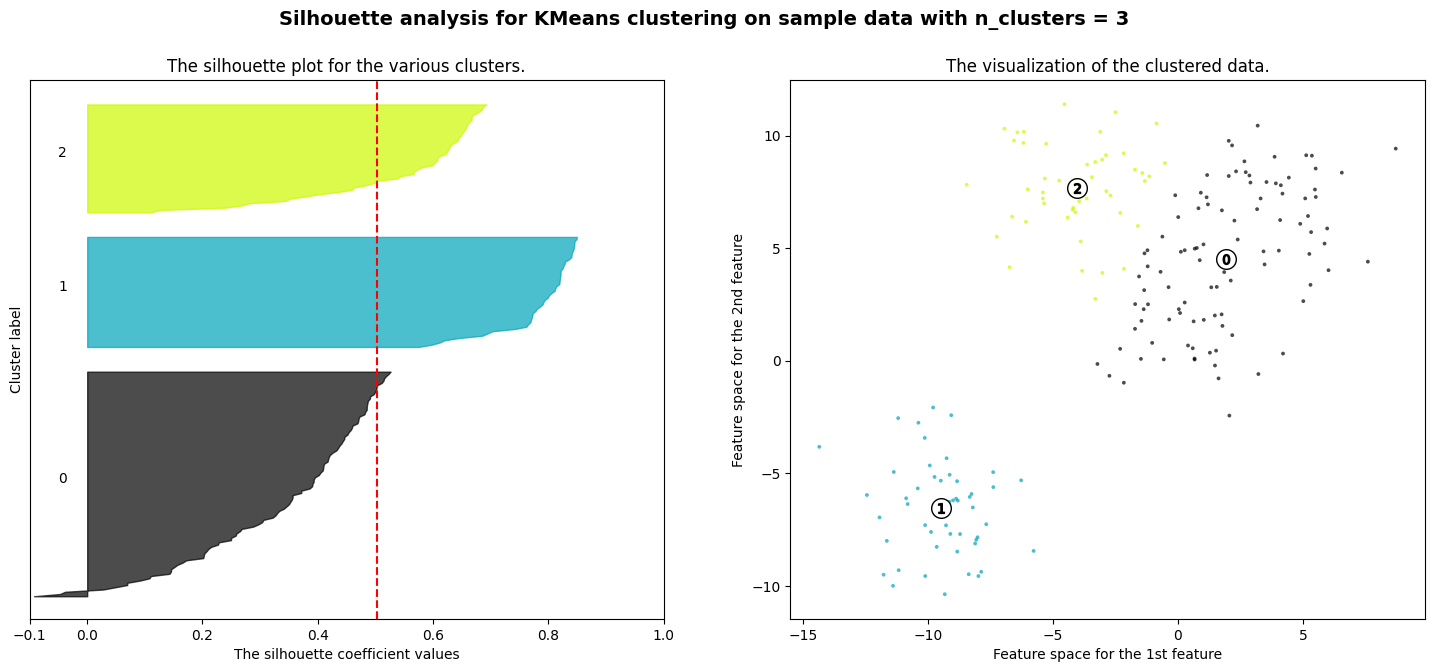

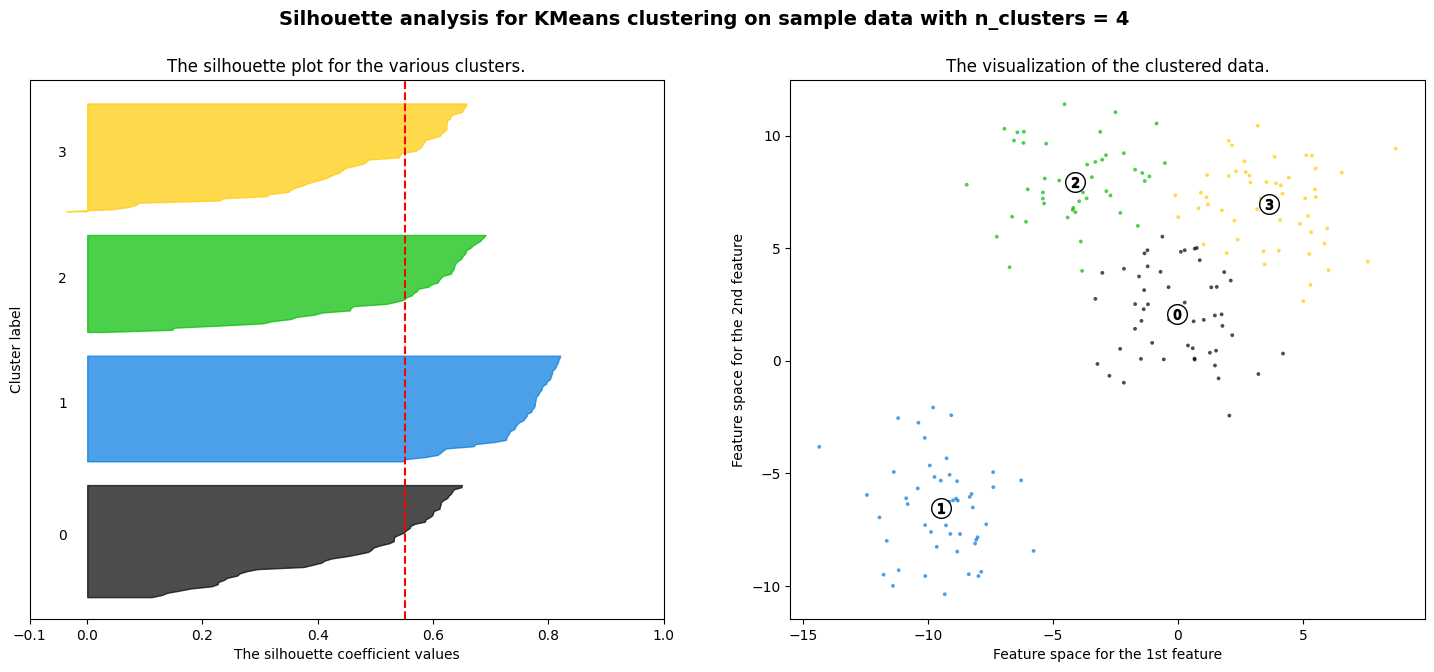

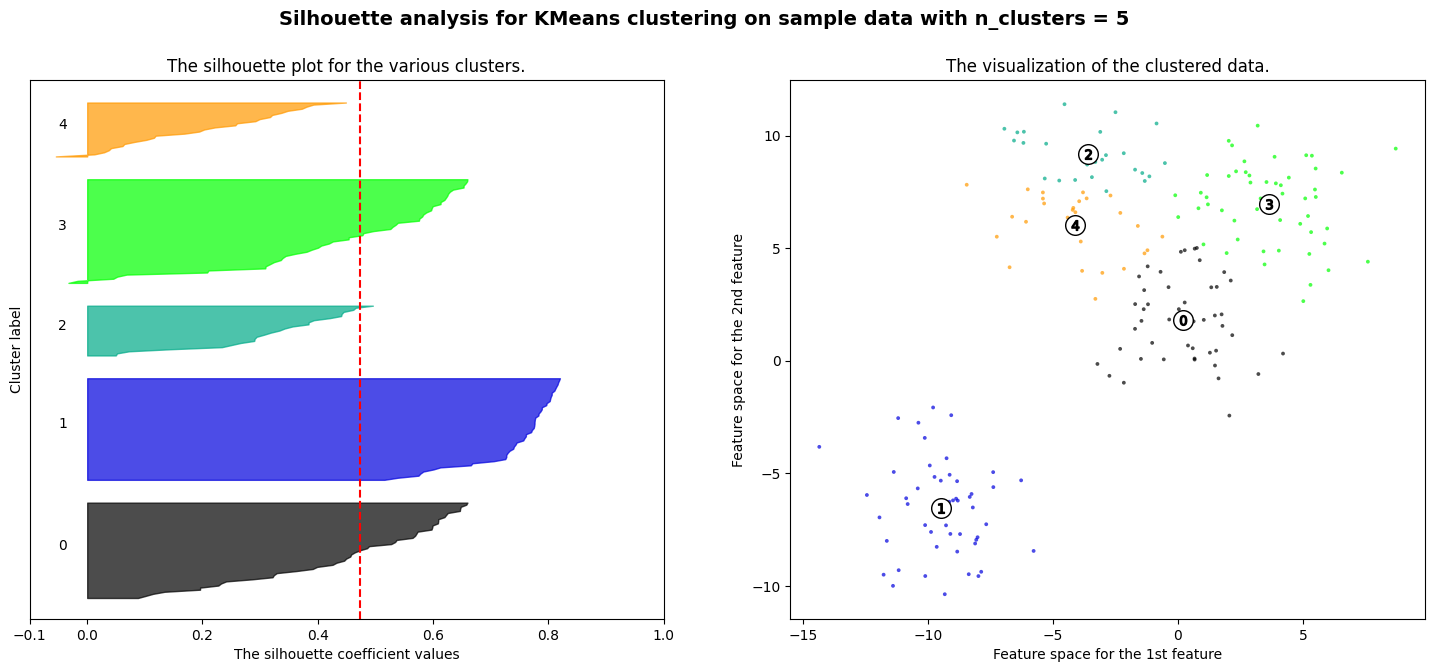

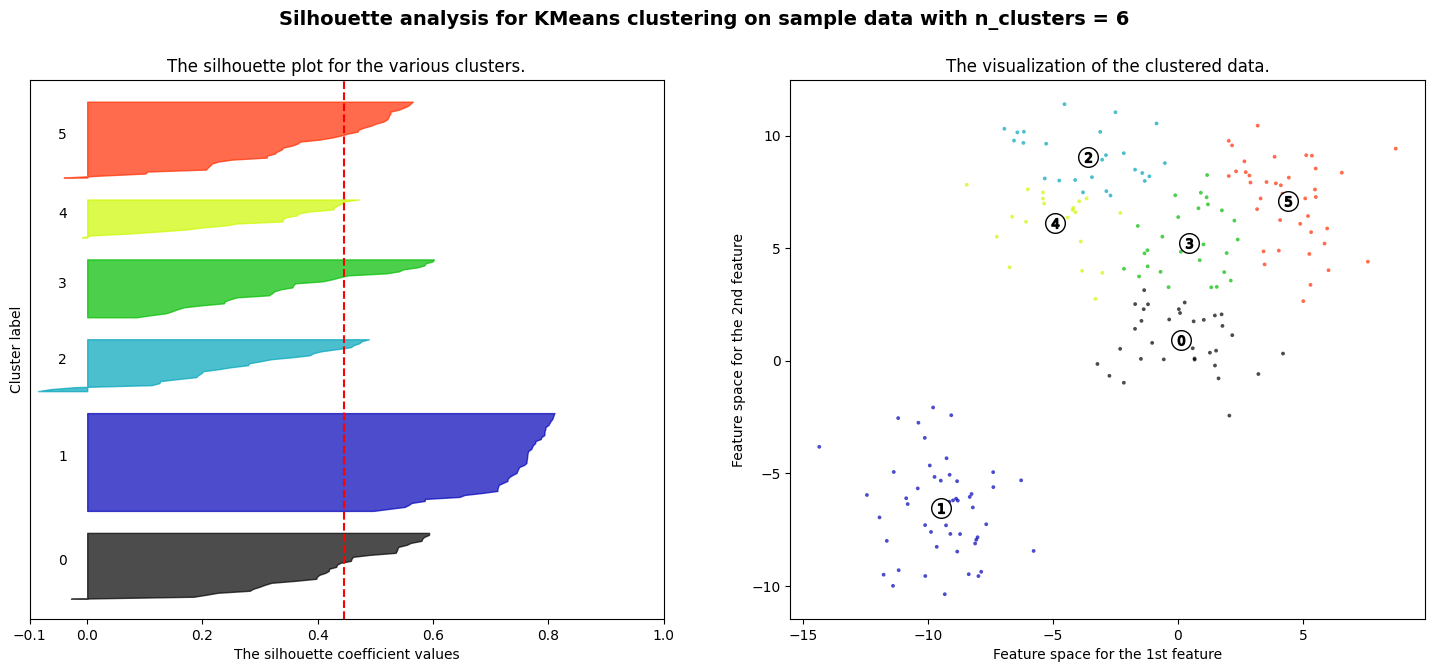

In [17]:
import numpy as np
import matplotlib.cm as cm
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_

    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### Clusterizacion Recomendada (k=??)

In [18]:
# Clusterizacion recomendada segun codo y silueta
best_k = 4  # En este ejemplo, coincide con el numero de centros usados en make_blobs
kmeans_rec = KMeans(n_clusters=best_k, random_state=42)
kmeans_rec.fit(X)
labels_rec = kmeans_rec.labels_

print("Numero de clusters recomendado (k):", best_k)

Numero de clusters recomendado (k): 4


c:\Users\adria\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


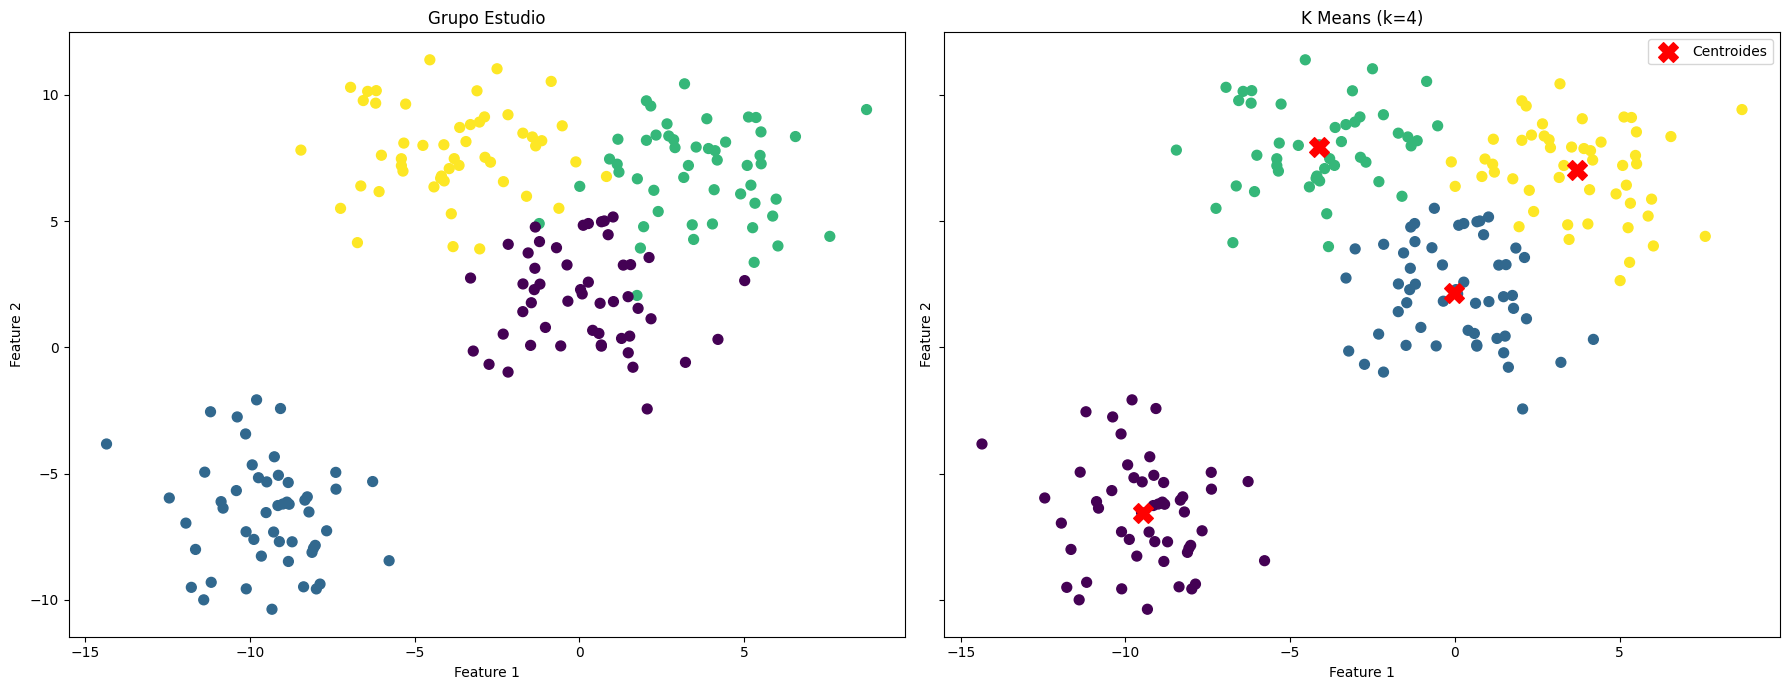

In [19]:
fig, (axes1,axes2) = plt.subplots(1,2, sharey=True, figsize=(18,7))

axes1.set_title('Grupo Estudio')
axes1.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50)
axes1.set_xlabel('Feature 1')
axes1.set_ylabel('Feature 2')

axes2.set_title(f'K Means (k={best_k})')
axes2.scatter(X[:,0], X[:,1], c=labels_rec, cmap='viridis', s=50)
axes2.scatter(kmeans_rec.cluster_centers_[:,0], kmeans_rec.cluster_centers_[:,1],
               s=200, c='red', marker='X', label='Centroides')
axes2.set_xlabel('Feature 1')
axes2.set_ylabel('Feature 2')
axes2.legend()

plt.tight_layout()
plt.show()

In [20]:
# Coeficiente de silueta para la clusterizacion recomendada
silhouette_best = silhouette_score(X, labels_rec)
print(f"Coeficiente de silueta para k = {best_k}: {silhouette_best:.3f}")

Coeficiente de silueta para k = 4: 0.552
